Updated Weight and Bias Values:
Weights: [[1.77862262]]
Bias: [-2.25658339]


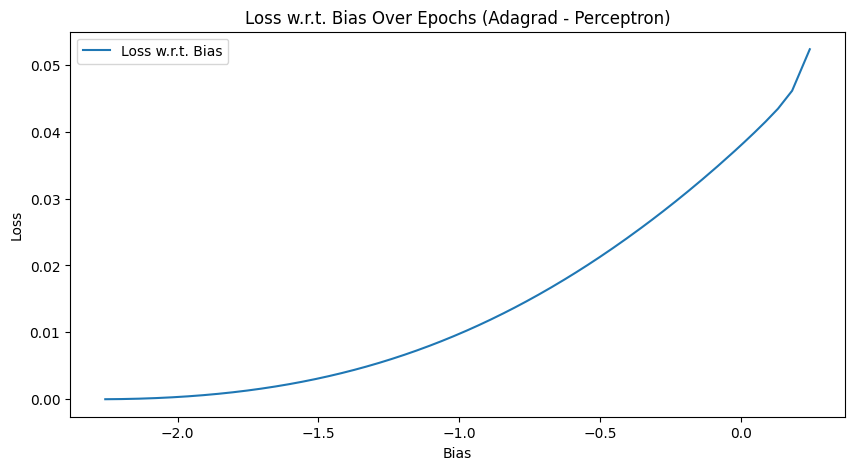

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return 1 if x > 0 else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_loss(X, Y, weights, bias):
    predictions = sigmoid(np.dot(X, weights) + bias)
    loss = 0.5 * np.mean((Y - predictions)**2)
    return predictions, loss

def update_weights_adagrad(X, Y, learning_rate, weights, bias, grad_squared_weights, grad_squared_bias):
    predictions, _ = compute_loss(X, Y, weights, bias)
    error = Y - predictions

    # Calculate gradients
    gradient_weights = -np.dot(X.T, error)
    gradient_bias = -np.sum(error)

    # Update gradients squared
    grad_squared_weights += gradient_weights**2
    grad_squared_bias += gradient_bias**2

    # Update weights using Adagrad
    weights -= (learning_rate / np.sqrt(grad_squared_weights + 1e-8)) * gradient_weights
    bias -= (learning_rate / np.sqrt(grad_squared_bias + 1e-8)) * gradient_bias

    return weights, bias, grad_squared_weights, grad_squared_bias

# Step a: Define initial data
X = np.array([[0.5], [2.5]])
Y = np.array([[0.2], [0.9]])

# Step b: Initialize a perceptron with random weights
input_size = 1
output_size = 1

weights = np.random.rand(input_size, output_size)
bias = np.random.rand(output_size)

# Adagrad optimizer parameters
learning_rate = 0.1
grad_squared_weights = np.zeros_like(weights)
grad_squared_bias = np.zeros_like(bias)

# Step c: Adagrad Optimization
num_epochs = 1000

loss_history = []
bias_history = []

for epoch in range(num_epochs):
    # Calculate squared error loss and update weights using Adagrad
    predictions, loss = compute_loss(X, Y, weights, bias)
    weights, bias, grad_squared_weights, grad_squared_bias = update_weights_adagrad(
        X, Y, learning_rate, weights, bias, grad_squared_weights, grad_squared_bias
    )

    loss_history.append(loss)
    bias_history.append(bias[0])  # Assuming a single bias for simplicity

# Step iii: Display updated weight and bias values
print("Updated Weight and Bias Values:")
print("Weights:", weights)
print("Bias:", bias)

# Step iv: Plot loss w.r.t. bias values
plt.figure(figsize=(10, 5))
plt.plot(bias_history, loss_history, label='Loss w.r.t. Bias')
plt.title('Loss w.r.t. Bias Over Epochs (Adagrad - Perceptron)')
plt.xlabel('Bias')
plt.ylabel('Loss')
plt.legend()
plt.show()
